<a href="https://colab.research.google.com/github/pedromasb/tutorials/blob/main/notebooks/interactive_viz_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> Interactive Plotting With Python: From Zero to Hero 🚀 </center>

Created by

[Pedro Mas Buitrago](https://pedromasb.github.io/)

Last updated by the author in December 2023

This demo shows how to perform interactive plotting in `python` with the package `plotly`, providing:

- A template for an extensive customisation of the plots.

- A function to create an html dashboard with `plotly` figures for data sharing.

## Loading the required packages

The packages used in this module can be found **[here](https://github.com/PyCoffees/notebooks/blob/main/notebooks/requirements/2023_12_13_requirements.txt)**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import plotly.graph_objects as go

---

## Creating our mock data

For the purpose of the demo, we will simulate some mock data. The function `create_mock_data()` generates a data frame (tabular data structure) of n_samples rows, with a uniform variable `x` and n_features `y` features.

In [2]:
def create_mock_data(from_val=0,to_val=20,n_features=5,n_samples=250):

    x = np.linspace(from_val,to_val,n_samples)  # Creates an evenly spaced interval
    samples = [f'Objeto {n}' for n in range(n_samples)]  # Creates a list with the n_samples object names

    df = pd.DataFrame({'obj':samples,'x':x})  # Creates a 2-columns DataFrame with the object names and the interval

    for i in range(n_features):

        # Simulates the features and joins then as new columns to the DataFrame

        y_it = x + np.random.normal(0,5,n_samples) + np.random.uniform(-5,5)
        df[f'y{i}'] = y_it

    return df

In [3]:
np.random.seed(17)

mock_df = create_mock_data()
mock_df.head()  # Shows the first 5 rows of the DataFrame

,obj,x,y0,y1,y2,y3,y4
0,Objeto 0,0.000000,-1.514710,0.236566,4.607711,-9.400935,-1.921214
1,Objeto 1,0.080321,-12.088858,9.268748,-5.783270,-16.729832,-2.689402
2,Objeto 2,0.160643,0.384109,-2.472269,0.827049,4.183948,8.600922
3,Objeto 3,0.240964,3.071481,7.762312,-2.095479,-12.034533,-5.631802
4,Objeto 4,0.321285,2.611198,-2.012807,-2.077242,-1.688153,-5.078212


---

## Static visualization of our data

We can perform static data visualizations using the `matplotlib` package.

Below, we plot the features of our `mock_df` data frame versus the variable `x`, using the last feature to define the size of the points.

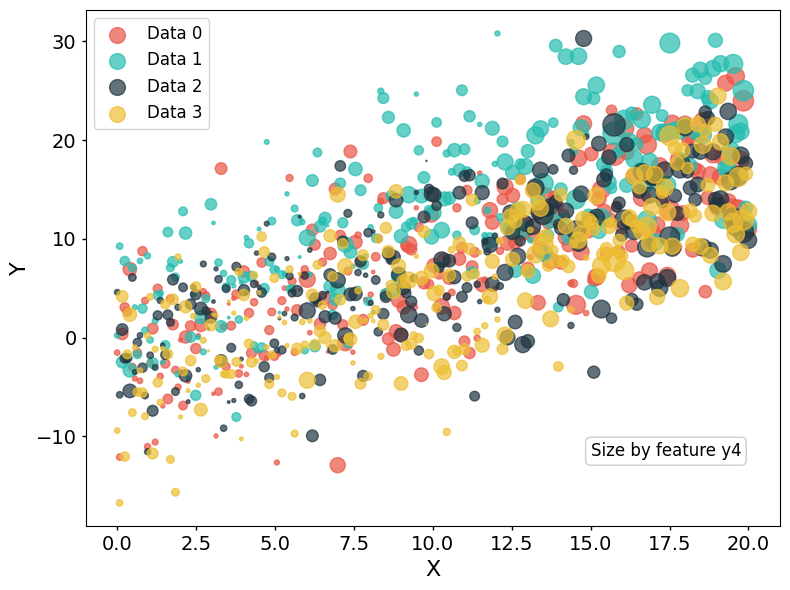

In [4]:
fig, ax = plt.subplots(figsize=(8,6))  # Creates the matplotlib figure

# x and y-axis formatting
ax.set_xlabel('X',fontsize=16)
ax.set_ylabel('Y',fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=14,width=1,length=3)

# List with the colours to use in the plot
colours = ['#ea5545','#25BDB0','#1F3440','#edbf33']

for k in range(len(mock_df.columns[2:-1])):

    # Plots the features of the DataFrame vs X, using the last one to define the size of the points

    ax.scatter(mock_df['x'],mock_df[f'y{k}'],alpha=0.7,s=abs(mock_df.iloc[:,-1])*8,color=colours[k],label=f'Data {k}')

plt.annotate(f'Size by feature {mock_df.columns[-1]}', (15,-12),fontsize=12,bbox=dict(boxstyle="round",ec="grey",alpha=0.4,fc='none'))
plt.legend(fontsize=12)

plt.tight_layout()  # Adjusts params so that the subplot(s) fits in to the figure area

plt.show()

Below is an example of how we could visualize each feature separately.

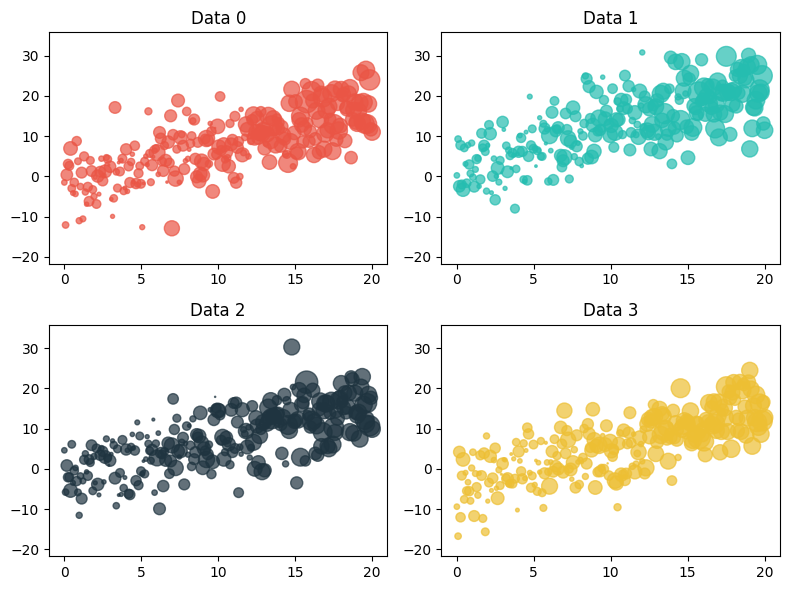

In [5]:
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(8,6))  # Creates the matplotlib figure with 2x2 subplots

# List with the colours to use in the plot
colours = ['#ea5545','#25BDB0','#1F3440','#edbf33']

for k in range(len(mock_df.columns[2:-1])):

    '''
    Plots the features of the DataFrame vs X, using the last one to define the size of the points.
    For each feature, we first select the corresponding subplot
    '''

    ax = plt.subplot(2,2,k+1)  # Add an axes to the current figure or retrieve an existing axes
    ax.set_ylim(bottom=mock_df.iloc[:,2:-1].min().min()-5,top=mock_df.iloc[:,2:-1].max().max()+5)  # We set as y-axis limits the min and the max values, taking into account all the features

    ax.scatter(mock_df['x'],mock_df[f'y{k}'],alpha=0.7,s=abs(mock_df.iloc[:,-1])*8,color=colours[k],label=f'Data {k}')
    ax.set_title(f'Data {k}')

plt.tight_layout()  # Adjusts params so that the subplot(s) fits in to the figure area

plt.show()

---

## Interactive visualization of our data &harr; <font color='gray'> Data Discovery </font> 🔎

`Plotly` is one of the most widely used packages for generating interactive plots in Python.

Here we have a *default* `plotly` visualization of our mock data.

In [6]:
# Dictionary (key:value) with the colour associated with each feature for the plot
colour_map = {'y0': 'rgba(234, 85, 69,0.8)', 'y1': 'rgba(37, 189, 176, 0.8)', 'y2': 'rgba(31, 52, 64,0.8)', 'y3':'rgba(237, 191, 51,0.8)'}

fig = px.scatter(data_frame=mock_df,x='x',y=['y0','y1','y2','y3'],size=abs(np.round(mock_df.iloc[:,-1],2)*8)*8,
                 hover_name='obj',  # Name of the pop-up menu when we hover over a point
                 width=800,
                 height=600,
                 color_discrete_map=colour_map)  #You can add the argument template for some predefined styles, such as plotly_white or plotly_dark

fig.show()

`Plotly` enables to modify nearly every aspect of the plot, but at the beginning it is a bit of a mess to use, as it works in a different way to `matplotlib`.

Below we have a **template with extensive information** to modify our interactive plot.

In [7]:
# Dictionary (key:value) with the colour associated with each feature for the plot
colour_map = {'y0': 'rgba(234, 85, 69,0.9)', 'y1': 'rgba(37, 189, 176, 0.9)', 'y2': 'rgba(31, 52, 64,0.9)', 'y3':'rgba(237, 191, 51,0.9)'}

# Dictionary (key:value) with the label associated with each feature for the legend
labels_map = {'y0': 'Data 0', 'y1': 'Data 1', 'y2': 'Data 2', 'y3':'Data 3'}

fig_scatter = px.scatter(data_frame=mock_df,x='x',y=['y0','y1','y2','y3'],
                         size=abs(np.round(mock_df.iloc[:,-1],2)*8),
                         hover_name='obj',  # Name of the pop-up menu when we hover over a point
                         width=800,
                         height=600,
                         color_discrete_map=colour_map)

# For each feature, we change the name to that included in the dictionary labels_map
fig_scatter.for_each_trace(lambda t: t.update(name = labels_map[t.name]))


# ----------------- From here it is only for formatting. No need to change anything -----------------


# Choose the figure font
font_dict=dict(family='Arial',
               size=16,
               color='black')

# General figure formatting
fig_scatter.update_layout(font=font_dict,  # font formatting
                          plot_bgcolor='white',  # background color
                          width=900,  # figure width
                          height=600,  # figure height
                          title={'text':'Interactive Scatter Plot','x':0.5,'font':{'size':24}},  # Title formatting
                          legend_title='Data Collections')

# x and y-axis formatting
fig_scatter.update_yaxes(title_text='Feature',  # axis title
                         showline=True,  # add line at x=0
                         showticklabels=True,
                         showgrid=False,  # plot grid
                         gridcolor='lightgrey',
                         linecolor='black',  # line color
                         linewidth=1, # line size
                         ticks='outside',  # ticks outside/inside axis
                         tickfont=font_dict, # tick label font
                         mirror=True,  # add ticks to top/right axes
                         tickwidth=1,  # tick width
                         tickcolor='black')  # tick color

fig_scatter.update_xaxes(title_text='x',
                         showline=True,
                         showticklabels=True,
                         showgrid=False,
                         gridcolor='lightgrey',
                         linecolor='black',
                         linewidth=1,
                         ticks='outside',
                         tickfont=font_dict,
                         mirror=True,
                         tickwidth=1,
                         tickcolor='black')

fig_scatter.show()

`Plotly` offers a wide selection of plots, that are discussed in their [Plotly Python Graphing Library](https://plotly.com/python/).

For some of them, it is useful to use `plotly.graph_objects`, instead of the `plotly.express` module. Let's see an example with a Violin plot.

In [8]:
import plotly.graph_objects as go

In [9]:
fig_violin = go.Figure()

# List with the features we want to plot
variables = ['y0','y1','y2','y3']

# Dictionary (key:value) with the label associated with each feature for the legend
labels_map = {'y0': 'Data 0', 'y1': 'Data 1', 'y2': 'Data 2', 'y3':'Data 3'}

# List with the colours for the plot
colours = ['#ea5545','#25BDB0','#1F3440','#edbf33']

# List with the colours (with transparency added) for the plot
colours_alpha = ['rgba(234, 85, 69,0.4)','rgba(37, 189, 176, 0.4)','rgba(31, 52, 64,0.4)','rgba(237, 191, 51,0.4)']

# We iterate and plot each feature separately
for i, var in enumerate(variables):
    fig_violin.add_trace(go.Violin(y=mock_df[var],
                                   name=var,
                                   points='all',
                                   pointpos=-1.8,
                                   line_color=colours[i],
                                   fillcolor=colours_alpha[i],
                                   box_visible=True,
                                   meanline_visible=True))

# For each feature, we change the name to that included in the dictionary labels_map
fig_violin.for_each_trace(lambda t: t.update(name = labels_map[t.name]))


# ----------------- From here it is only for formatting. No need to change anything -----------------

# choose the figure font
font_dict=dict(family='Arial',
               size=16,
               color='black')

# General figure formatting
fig_violin.update_layout(font=font_dict,  # font formatting
                          plot_bgcolor='white',  # background color
                          width=900,  # figure width
                          height=600,  # figure height
                          title={'text':'Interactive Violin Plot','x':0.5,'font':{'size':24}},  # Title formatting
                          legend_title='Data Collections',
                          legend=dict(orientation="h",y = -0.13, x = 0))  # We include the legend horizontally underneath the plot

# x and y-axis formatting
fig_violin.update_yaxes(title_text='Feature',  # axis title
                         showline=True,  # add line at x=0
                         showticklabels=True,
                         showgrid=False,  # plot grid
                         gridcolor='lightgrey',
                         linecolor='black',  # line color
                         linewidth=1, # line size
                         ticks='outside',  # ticks outside/inside axis
                         tickfont=font_dict, # tick label font
                         mirror=True,  # add ticks to top/right axes
                         tickwidth=1,  # tick width
                         tickcolor='black')  # tick color

fig_violin.update_xaxes(title_text='',
                         showline=True,
                         showticklabels=True,
                         showgrid=False,
                         gridcolor='lightgrey',
                         linecolor='black',
                         linewidth=1,
                         ticks='outside',
                         tickfont=font_dict,
                         mirror=True,
                         tickwidth=1,
                         tickcolor='black')

fig_violin.show()

---

## Creating a Dashboard in html with `plotly` figures

The function `figures_to_html()` **generates an html file** including multiple `plotly` figures.

In [10]:
def figures_to_html(figs, filename="dashboard.html"):

    '''
    figs: lista con las figuras de plotly que queramos unir
    filename: nombre del archivo html final
    '''

    # We open the file. If the file already exists, it is overwritten. To append on a existing file, change 'w' to 'a'
    with open(filename, 'w',encoding="utf-8") as dashboard:

        # Writes the title of the html dashboard.
        dashboard.write('''<html><head><center><h1 style="font-size: 24;font-family: arial"> Interactive Plots - PyCoffees </h1></center></head><body> \n ''')

        # Extracts the html code from each plotly figure and appends it to the html, including an horizontal bar between each figure
        for fig in figs:
            inner_html = fig.to_html().split('<body>')[1].split('</body>')[0]
            dashboard.write(f'''<HR WIDTH=60%> <br> <center> {inner_html} </center> <br>''' )

        # Ends the html
        dashboard.write("</body></html> \n")

Below we have an example on how to use it.

In [11]:
figs_list = [fig_scatter,fig_violin]  # We create a list with the plotly figures
figures_to_html(figs_list)

---

## Don't Panic!

Sometimes `plotly` charts may not show up in your Jupyter environment.

- **[This article](https://saturncloud.io/blog/troubleshooting-plotly-chart-not-showing-in-jupyter-notebook/)** addresses the common reasons for `plotly` charts not showing up in Jupyter Notebook.


- You can also try to run the following line from a terminal:
```
jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10
```